In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nanonispy as nap
%matplotlib inline

In [32]:
path_prefix="C:\\Users\\yichen\\Desktop\\FeTe on Bi2Te3_Guannan\\Run #88 FeTe on Bi2Te3(MBE-2 #175)\\Bias Spectroscopy"
path = path_prefix + str(131) + ".dat"
data = np.loadtxt(path,skiprows=51)

In [33]:
plt.figure(figsize=(8,6))
plt.plot(data[:,0]*1000,data[:,2])
plt.ylim(bottom=0)
#plt.xlim((-3,3))
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

savepath = path_prefix + str(131) + ".png"
plt.savefig(savepath, dpi=300)
plt.close()

In [23]:
linecut_temp = nap.read.Grid('.\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid Spectroscopy105.3ds')
lc_bias_vals=linecut_temp.signals.get("sweep_signal")
lc_bias = lc_bias_vals *1000

In [24]:
linecut=linecut_temp.signals.get("Lockin X (V)")

In [51]:
plt.figure(figsize=(4,12))
for i in range(61):
    if i < 10:
        plt.plot(lc_bias,linecut[i,0]+0.5*i,color='#009600')
    elif i > 16:
        plt.plot(lc_bias,linecut[i,0]+0.5*i, color='#FFC000')
    else:
        plt.plot(lc_bias,linecut[i,0]+0.5*i,color='#F06AB0');
#plt.axvline(x=0,linestyle='--',dashes=(8, 8), lw = 0.75, color='black')
#plt.axvline(x=0.16,linestyle='--',dashes=(8, 8),lw = 0.7, color='black')
#plt.axvline(x=-0.16,linestyle='--',dashes=(8, 8),lw = 0.7, color='black')
#plt.axvline(x=0.5,linestyle='--',dashes=(8, 8), lw = 0.7, color='black')
#plt.axvline(x=-0.5,linestyle='--',dashes=(8, 8), lw = 0.7, color='black')
#plt.axvline(x=0.8,linestyle='--',dashes=(8, 8), lw = 0.7, color='black')
#plt.axvline(x=-0.8,linestyle='--',dashes=(8, 8), lw = 0.7, color='black')
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim((0,33))
#plt.xlim((-8,8))
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Linecut 105.png", dpi=300)
plt.close()

In [10]:
zbc=linecut[18,0,50]
bg=(linecut[18,0,:45].mean()+linecut[18,0,56:].mean())*0.5
depth_ratio = (bg-zbc)/bg

0.3108547959251934

In [56]:
plt.figure(figsize=(9,3))
depth_list = []
for i in range(17,61):
    zbc=linecut[i,0,50]
    bg=(linecut[i,0,:41].mean()+linecut[i,0,60:].mean())*0.5
    depth_ratio = (bg-zbc)/bg
    depth_list.append(depth_ratio)
plt.plot(depth_list,'.-', color='#FFC000')
plt.xlabel("Distance (nm)",size=15)
plt.ylabel("Depth",size=15)
plt.ylim((0,0.8))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Linecut 105_depth ratio.png", dpi=300)
plt.close()

In [25]:
Height = linecut_temp.signals.get('topo')

In [26]:
h = Height.flatten()

In [52]:
plt.figure(figsize=(9,3))
height_sub = 0.68*(h+5.9*10**(-8))*10**9
for i in range(61):
    if i < 10:
        plt.plot(i,height_sub[i]+0.002*i,'.', color='#009600')
    elif i > 16:
        plt.plot(i,height_sub[i]+0.002*i,'.', color='#FFC000')
    else:
        plt.plot(i,height_sub[i]+0.002*i,'.',color='#F06AB0');
plt.xlabel("Distance (nm)",size=15)
plt.ylabel("Height (nm)",size=15)
#plt.ylim((-0.25,1.25))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Linecut 105_height.png", dpi=300)
plt.close()

In [20]:
grid=nap.read.Grid(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid Spectroscopy042.3ds")
bias_vals=grid.signals.get("sweep_signal")
bias = bias_vals *1000
lockin=grid.signals.get("Lockin X (V)")

In [22]:
ZBC = lockin[:,:,25]

In [111]:
ZBC_true = ZBC.reshape((40,30))

In [23]:
plt.figure()
plt.imshow(ZBC,cmap='YlGnBu_r',aspect=1,origin='lower',vmin=0.0, vmax=1.2);
plt.colorbar(shrink=1)
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid 91_ZBC.png", dpi=300)
plt.close()

In [31]:
plt.figure()
plt.plot(bias,lockin[51,31,:],'#FF33CC');
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim((0,3.2))
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid 91_one point.png", dpi=300)
plt.close()

In [271]:
grid_vortex = lockin[60:,10:50,:]

In [76]:
lockin_true = lockin.reshape((33,40,41))

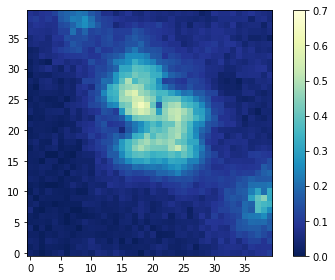

In [273]:
plt.figure()
plt.imshow(grid_vortex[:,:,50],cmap='YlGnBu_r',aspect=1,origin='lower',vmin=0.0, vmax=0.7);
plt.colorbar(shrink=1)
plt.tight_layout()

In [304]:
linecut1 = grid_vortex[:,18,:]
linecut2 = grid_vortex[:,20,:]
linecut3 = grid_vortex[:,24,:]

In [311]:
plt.figure(figsize=(4,10))
for i in range(40):
    plt.plot(bias,linecut3[i,:]+0.2*i)
plt.axvline(x=0.16,linestyle='--',dashes=(8, 8),lw = 0.7, color='black')
plt.axvline(x=-0.16,linestyle='--',dashes=(8, 8),lw = 0.7, color='black')
plt.axvline(x=0.5,linestyle='--',dashes=(8, 8), lw = 0.7, color='black')
plt.axvline(x=-0.5,linestyle='--',dashes=(8, 8),lw = 0.7, color='black')
plt.axvline(x=0.8,linestyle='--',dashes=(8, 8), lw = 0.7, color='black')
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.ylim((0,9))
plt.xlim((-3,3))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid 54_linecut_6.png", dpi=300)
plt.close()

In [22]:
plt.figure()
plt.plot(bias,np.mean(lockin,axis=(0,1)),'orange',label='All average');
#plt.plot(bias,np.mean(lockin[1:,:,:],axis=(0,1)),'#FF33CC',label='Average over pink box');
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim((0,1.8))
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid 42_avg_2.png", dpi=300)
plt.close()

In [7]:
plt.figure()
for i in range(49):
    for j in range(50):
        plt.plot(bias,lockin[i,j,:],'darkblue',lw=0.05);
plt.plot(bias,np.mean(lockin,axis=(0,1)),'orange');
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("dI/dV (a.u.)",size=15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim((0,4))
plt.tight_layout()
plt.savefig(".\Run #88 FeTe on Bi2Te3(MBE-2 #175)\Grid 71_all.png", dpi=300)
plt.close()